# Sartorious experiments data-plotting code

In [24]:
# Importing python packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 

# Importing files
std = '505'
folder = (r"C:\Users\Shivam\Documents\GitHub\viscosity_liquid_transfer_Pablo\Opentrons_experiments\BOTorch_optimization\VS_code_csv")

df_cal = pd.read_csv(folder+r'/Viscosity_std_'+std+'_3_vol_opt_duplicate_unused.csv')

df_cal.dtypes


liquid              object
pipette             object
volume               int64
aspiration_rate    float64
dispense_rate      float64
blow_out_rate        int64
delay_aspirate       int64
delay_dispense       int64
delay_blow_out       int64
%error             float64
time_asp_1000      float64
acq_value          float64
dtype: object

In [25]:
# Calculate time for 1000ul
df_cal['time_for_1000'] = 0
for i in range(len(df_cal)):
    if (df_cal['blow_out_rate'].iloc[i])<=0:
        df_cal['time_for_1000'].iloc[i] = 1000/df_cal["aspiration_rate"].iloc[i] + 1000/df_cal["dispense_rate"].iloc[i] + df_cal["delay_aspirate"].iloc[i] + df_cal["delay_dispense"].iloc[i] + df_cal["delay_blow_out"].iloc[i]
    else:
        df_cal['time_for_1000'].iloc[i] = 1000/df_cal["aspiration_rate"].iloc[i] + 1000/df_cal["dispense_rate"].iloc[i] + 150/df_cal["blow_out_rate"].iloc[i] + df_cal["delay_aspirate"].iloc[i] + df_cal["delay_dispense"].iloc[i] + df_cal["delay_blow_out"].iloc[i]
df_cal
# Getting unique values of time in a numpy array
#TM = df_cal['time_for_1000'].unique()
#TM

C:\Users\Shivam\AppData\Local\Temp\ipykernel_16008\3781546395.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal['time_for_1000'].iloc[i] = 1000/df_cal["aspiration_rate"].iloc[i] + 1000/df_cal["dispense_rate"].iloc[i] + df_cal["delay_aspirate"].iloc[i] + df_cal["delay_dispense"].iloc[i] + df_cal["delay_blow_out"].iloc[i]


,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_aspirate,delay_dispense,delay_blow_out,%error,time_asp_1000,acq_value,time_for_1000
0,Viscosity_std_505,p1000,1000,49.507284,49.507284,0,5,5,0,-7.382241,50.398096,NaN,50.398096
1,Viscosity_std_505,p1000,500,49.507284,49.507284,0,5,5,0,-8.280548,50.398096,NaN,50.398096
2,Viscosity_std_505,p1000,300,49.507284,49.507284,0,5,5,0,-8.556950,50.398096,NaN,50.398096
3,Viscosity_std_505,p1000,1000,61.884105,4.950728,0,5,5,0,-0.345503,228.149719,NaN,228.149719
4,Viscosity_std_505,p1000,500,61.884105,4.950728,0,5,5,0,-2.360935,228.149719,NaN,228.149719
5,Viscosity_std_505,p1000,300,61.884105,4.950728,0,5,5,0,-2.760183,228.149719,NaN,228.149719
6,Viscosity_std_505,p1000,1000,4.950728,4.950728,0,5,5,0,2.810089,413.980961,NaN,413.980961
7,Viscosity_std_505,p1000,500,4.950728,4.950728,0,5,5,0,8.372682,413.980961,NaN,413.980961
8,Viscosity_std_505,p1000,300,4.950728,4.950728,0,5,5,0,15.167569,413.980961,NaN,413.980961
9,Viscosity_std_505,p1000,1000,4.950728,61.884105,0,5,5,0,-7.382241,228.149719,NaN,228.149719


#### Making a scatterplot

In [26]:
df_cal_mean = df_cal.loc[(df_cal['volume'] == "mean[300, 500, 1000]")]
df_cal_int = df_cal.loc[(df_cal['volume'] != "mean[300, 500, 1000]")]
df_cal_int["volume"] = df_cal_int["volume"].apply(pd.to_numeric)
df_cal_1000 = df_cal_int.loc[(df_cal_int['volume'] == 1000)]
df_cal_500 = df_cal_int.loc[(df_cal_int['volume'] == 500)]
df_cal_300 = df_cal_int.loc[(df_cal_int['volume'] == 300)]
df_cal_100 = df_cal_int.loc[(df_cal_int['volume'] == 100)]

count = 1
df_cal_1000['iteration']=0
df_cal_500['iteration']=0
df_cal_300['iteration']=0
df_cal_mean['iteration']=0
for i in range(len(df_cal_1000)):
    df_cal_1000['iteration'].iloc[i]=count
    count+=1
count = 1
for i in range(len(df_cal_500)):
    df_cal_500['iteration'].iloc[i]=count
    count+=1
count = 1
for i in range(len(df_cal_300)):
    df_cal_300['iteration'].iloc[i]=count
    count+=1
count = 1
for i in range(len(df_cal_mean)):
    df_cal_mean['iteration'].iloc[i]=count
    count+=1

C:\Users\Shivam\AppData\Local\Temp\ipykernel_16008\1833002406.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_1000['iteration']=0
C:\Users\Shivam\AppData\Local\Temp\ipykernel_16008\1833002406.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_500['iteration']=0
C:\Users\Shivam\AppData\Local\Temp\ipykernel_16008\1833002406.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [27]:
for i in range(len(df_cal_mean)):
    df_cal_mean["%error"].iloc[i]=(df_cal_1000["%error"].iloc[i]+df_cal_500["%error"].iloc[i]+df_cal_300["%error"].iloc[i])/3
df_cal_mean.head(10)

,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_aspirate,delay_dispense,delay_blow_out,%error,time_asp_1000,acq_value,time_for_1000,iteration


In [28]:
df_cal_300.head(10)

,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_aspirate,delay_dispense,delay_blow_out,%error,time_asp_1000,acq_value,time_for_1000,iteration
2,Viscosity_std_505,p1000,300,49.507284,49.507284,0,5,5,0,-8.556950,50.398096,NaN,50.398096,1
5,Viscosity_std_505,p1000,300,61.884105,4.950728,0,5,5,0,-2.760183,228.149719,NaN,228.149719,2
8,Viscosity_std_505,p1000,300,4.950728,4.950728,0,5,5,0,15.167569,413.980961,NaN,413.980961,3
11,Viscosity_std_505,p1000,300,4.950728,61.884105,0,5,5,0,-4.679642,228.149719,NaN,228.149719,4
14,Viscosity_std_505,p1000,300,61.884105,61.884105,0,5,5,0,-10.246075,42.318477,NaN,42.318477,5
17,Viscosity_std_505,p1000,300,61.541517,22.744060,0,5,5,0,-2.261123,70.216717,45.753649,70.216717,6
20,Viscosity_std_505,p1000,300,54.587845,21.882120,0,5,5,0,-4.718031,74.018507,58.616618,74.018507,7
23,Viscosity_std_505,p1000,300,61.790732,27.107443,0,5,5,0,-8.365004,63.073893,32.920994,63.073893,8
26,Viscosity_std_505,p1000,300,49.815477,14.513244,0,5,5,0,-1.877231,98.976668,26.495073,98.976668,9
29,Viscosity_std_505,p1000,300,52.997340,11.122566,0,5,5,0,-2.069177,118.776184,25.288035,118.776184,10


In [ ]:
# Making subplots (2 rows, 1 column)
fig,axs = plt.subplots(2,1)

# Plotting graph 1: Iteration against error
axs[0].scatter(df_cal_1000['iteration'],df_cal_1000['%error'], marker= 'x', label = '1000', c = 'red')
axs[0].scatter(df_cal_500['iteration'],df_cal_500['%error'], marker= 'x', label = '500', c = 'green')
axs[0].scatter(df_cal_300['iteration'],df_cal_300['%error'], marker= 'x', label = '300', c = 'blue')
#axs[0].scatter(df_cal_mean['iteration'],df_cal_mean['%error'], marker= 'x', label = 'mean', c = 'orange')

# Setting graph 1 labels
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error [%]')

# Plotting graph 2: Iteration against Time
#axs[1].scatter(df_cal_mean['iteration'],df_cal_mean['time_for_1000'], marker= 'x', label = 'mean', c = 'orange')
axs[1].scatter(df_cal_1000['iteration'],df_cal_1000['time_for_1000'], marker= 'x', label = '1000', c = 'red')
axs[1].scatter(df_cal_500['iteration'],df_cal_500['time_for_1000'], marker= 'x', label = '500', c = 'green')
axs[1].scatter(df_cal_300['iteration'],df_cal_300['time_for_1000'], marker= 'x', label = '300', c = 'blue')

# Setting graph 2 labels
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Time for 1000ul (s)')

#Formatting subplots
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig.set_size_inches(17, 10)
fig.suptitle('Viscosity_std_'+std+'_exp3')
axs[0].legend(bbox_to_anchor=(1.1, 1.05))
fig.tight_layout()
axs[0].xaxis.set_major_locator(MultipleLocator(1))
axs[0].xaxis.set_major_formatter('{x:.0f}')
axs[0].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
axs[1].xaxis.set_major_locator(MultipleLocator(1))
axs[1].xaxis.set_major_formatter('{x:.0f}')

folder1 = (r"C:\Users\Shivam\Documents\GitHub\viscosity_liquid_transfer_Pablo\Opentrons_experiments\BOTorch_optimization\VS_code_csv\graphs")
#fig.savefig(folder1+r'/'+'Viscosity_std_'+std+'_updated.png')

In [ ]:
#Making subplots (2 rows, 1 column)
fig,axs = plt.subplots(2,1)

"""# Dropping NAN rows
df_cal_1000 = df_cal.where(df_cal.volume==1000).dropna(how='all')
df_cal_500 = df_cal.where(df_cal.volume==500).dropna(how='all')
df_cal_300 = df_cal.where(df_cal.volume==300).dropna(how='all')
df_cal_100 = df_cal.where(df_cal.volume==100).dropna(how='all')
"""
# Plotting graph 1: Iteration against error
axs[0].plot(df_cal_1000['iteration'],df_cal_1000['%error'], marker= 'x', label = '1000', c = 'red')
axs[0].plot(df_cal_500['iteration'],df_cal_500['%error'], marker= 'x', label = '500', c = 'green')
axs[0].plot(df_cal_300['iteration'],df_cal_300['%error'], marker= 'x', label = '300', c = 'blue')
axs[0].plot(df_cal_mean['iteration'],df_cal_mean['%error'], marker= 'x', label = 'mean', c = 'orange')

axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error [%]')

axs[1].plot(df_cal_mean['iteration'],df_cal_mean['time_for_1000'], marker= 'x', label = '300', c = 'orange')
axs[1].plot(df_cal_1000['iteration'],df_cal_1000['time_for_1000'], marker= 'x', c = 'red')
axs[1].plot(df_cal_500['iteration'],df_cal_500['time_for_1000'], marker= 'x', label = '500', c = 'green')
axs[1].plot(df_cal_300['iteration'],df_cal_300['time_for_1000'], marker= 'x', label = '300', c = 'blue')


axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Time for 1000ul (s)')

fig.set_size_inches(17, 10)
fig.suptitle('Viscosity_std_'+std+'_exp3')
axs[0].legend(bbox_to_anchor=(1.1, 1.05))
fig.tight_layout()

axs[0].xaxis.set_major_locator(MultipleLocator(1))
axs[0].xaxis.set_major_formatter('{x:.0f}')
axs[0].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
axs[1].xaxis.set_major_locator(MultipleLocator(1))
axs[1].xaxis.set_major_formatter('{x:.0f}')
#fig.savefig(folder1+r'/'+'Viscosity_std_'+std+'_scatter_updated.png')


In [29]:
folder2 = (r"C:\Users\Shivam\Documents\GitHub\viscosity_liquid_transfer_Pablo\Std_calibrations")

df_calibrations = pd.read_csv(folder2+r'/Viscosity_std_'+std+'.csv')

calibration_drop=df_calibrations.drop_duplicates(subset=["volume","aspiration_rate","dispense_rate","blow_out_rate","delay_aspirate","delay_dispense","delay_blow_out","touch_tip_aspirate","touch_tip_dispense"], keep='first')
calibration_drop['time_for_1000']=0
for i in range(len(calibration_drop)):
    if (calibration_drop['blow_out_rate'].iloc[i])<=0:
        calibration_drop['time_for_1000'].iloc[i] = 1000/calibration_drop["aspiration_rate"].iloc[i] + 1000/calibration_drop["dispense_rate"].iloc[i] + calibration_drop["delay_aspirate"].iloc[i] + calibration_drop["delay_dispense"].iloc[i] + calibration_drop["delay_blow_out"].iloc[i]
    else:
        calibration_drop['time_for_1000'].iloc[i] = 1000/calibration_drop["aspiration_rate"].iloc[i] + 1000/calibration_drop["dispense_rate"].iloc[i] + 150/calibration_drop["blow_out_rate"].iloc[i] + calibration_drop["delay_aspirate"].iloc[i] + calibration_drop["delay_dispense"].iloc[i] + calibration_drop["delay_blow_out"].iloc[i]
calibration_drop

C:\Users\Shivam\AppData\Local\Temp\ipykernel_16008\2141755623.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_drop['time_for_1000']=0
C:\Users\Shivam\AppData\Local\Temp\ipykernel_16008\2141755623.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_drop['time_for_1000'].iloc[i] = 1000/calibration_drop["aspiration_rate"].iloc[i] + 1000/calibration_drop["dispense_rate"].iloc[i] + calibration_drop["delay_aspirate"].iloc[i] + calibration_drop["delay_dispense"].iloc[i] + calibration_drop["delay_blow_out"].iloc[i]
C:\Users\Shivam\AppData\Loca

,liquid,Viscosity 10 s-1,Viscosity 100 s-1,Viscosity 900 s-1,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_aspirate,delay_dispense,delay_blow_out,touch_tip_aspirate,touch_tip_dispense,time,%error,m_measured,m_expected,time_for_1000
0,Viscosity_std_505.4,505.4,505.4,505.4,p1000,1000,43.0,43,0,0.0,0.0,0,True,False,52.402341,-18.657146,0.7063,0.86830,46.511628
1,Viscosity_std_505.4,505.4,505.4,505.4,p1000,1000,40.0,40,0,0.0,0.0,0,True,False,56.356964,-17.643672,0.7151,0.86830,50.000000
2,Viscosity_std_505.4,505.4,505.4,505.4,p1000,1000,43.0,43,5,5.0,5.0,0,True,False,89.094670,2.487619,0.8899,0.86830,86.511628
3,Viscosity_std_505.4,505.4,505.4,505.4,p1000,1000,43.0,43,5,2.0,2.0,0,True,False,83.891726,-2.314868,0.8482,0.86830,80.511628
4,Viscosity_std_505.4,505.4,505.4,505.4,p1000,1000,43.0,43,5,0.0,0.0,0,True,False,79.937716,-7.094322,0.8067,0.86830,76.511628
5,Viscosity_std_505.4,505.4,505.4,505.4,p1000,1000,43.0,43,5,3.5,3.5,0,True,False,86.962497,0.518254,0.8728,0.86830,83.511628
7,Viscosity_std_505.4,505.4,505.4,505.4,p1000,1000,43.0,43,5,2.5,2.5,0,True,False,84.311817,0.564321,0.8732,0.86830,81.511628
8,Viscosity_std_505.4,505.4,505.4,505.4,p1000,1000,43.0,43,0,3.5,3.5,0,True,False,59.809127,-4.433951,0.8298,0.86830,53.511628
9,Viscosity_std_505.4,505.4,505.4,505.4,p1000,500,43.0,43,0,3.5,3.5,0,True,False,35.795705,-7.658643,0.4009,0.43415,53.511628
10,Viscosity_std_505.4,505.4,505.4,505.4,p1000,500,43.0,43,5,3.5,3.5,0,True,False,63.738007,7.497409,0.4667,0.43415,83.511628


In [30]:
calibration_1000 = calibration_drop.loc[(calibration_drop['volume'] == 1000)]
calibration_500 = calibration_drop.loc[(calibration_drop['volume'] == 500)]
calibration_300 = calibration_drop.loc[(calibration_drop['volume'] == 300)]
count = 1
calibration_1000['iteration']=0
calibration_500['iteration']=0
calibration_300['iteration']=0
for i in range(len(calibration_1000)):
    calibration_1000['iteration'].iloc[i]=count
    count+=1
count = 1
for i in range(len(calibration_500)):
    calibration_500['iteration'].iloc[i]=count
    count+=1
count = 1
for i in range(len(calibration_300)):
    calibration_300['iteration'].iloc[i]=count
    count+=1

C:\Users\Shivam\AppData\Local\Temp\ipykernel_16008\2344505822.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_1000['iteration']=0
C:\Users\Shivam\AppData\Local\Temp\ipykernel_16008\2344505822.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibration_500['iteration']=0
C:\Users\Shivam\AppData\Local\Temp\ipykernel_16008\2344505822.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [31]:
calibration_300.head(20)

,liquid,Viscosity 10 s-1,Viscosity 100 s-1,Viscosity 900 s-1,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_aspirate,delay_dispense,delay_blow_out,touch_tip_aspirate,touch_tip_dispense,time,%error,m_measured,m_expected,time_for_1000,iteration
20,Viscosity_std_505.4,505.4,505.4,505.4,p1000,300,41.5,43,5,3.0,2.5,0,True,False,53.218530,2.230412,0.2663,0.26049,82.852199,1
21,Viscosity_std_505.4,505.4,505.4,505.4,p1000,300,42.0,43,5,3.0,2.5,0,True,False,53.040124,-1.301394,0.2571,0.26049,82.565338,2
22,Viscosity_std_505.4,505.4,505.4,505.4,p1000,300,41.8,43,5,3.0,2.5,0,True,False,53.166063,-1.147837,0.2575,0.26049,82.679259,3
26,Viscosity_std_505.4,505.4,505.4,505.4,p1000,300,41.3,43,5,3.0,2.5,0,True,False,53.270658,-2.990518,0.2527,0.26049,82.968889,4
27,Viscosity_std_505.4,505.4,505.4,505.4,p1000,300,40.8,43,5,3.0,2.5,0,True,False,53.380343,-2.683404,0.2535,0.26049,83.265618,5
28,Viscosity_std_505.4,505.4,505.4,505.4,p1000,300,40.0,43,5,3.0,2.5,0,True,False,53.584855,-3.719912,0.2508,0.26049,83.755814,6
30,Viscosity_std_505.4,505.4,505.4,505.4,p1000,300,39.0,43,5,3.0,2.5,0,True,False,53.786076,-3.297631,0.2519,0.26049,84.396840,7
31,Viscosity_std_505.4,505.4,505.4,505.4,p1000,300,41.0,43,5,5.0,2.5,0,True,False,55.459367,7.681677,0.2805,0.26049,85.146058,8
32,Viscosity_std_505.4,505.4,505.4,505.4,p1000,300,41.0,43,5,3.5,2.5,0,True,False,53.964068,-2.875350,0.2530,0.26049,83.646058,9
33,Viscosity_std_505.4,505.4,505.4,505.4,p1000,300,41.0,43,5,4.0,2.5,0,True,False,54.433158,1.078736,0.2633,0.26049,84.146058,10


In [ ]:
#Making subplots (2 rows, 1 column)
fig,axs = plt.subplots(2,1)

# Plotting graph 1: Iteration against error
axs[0].plot(df_cal_1000['iteration'],df_cal_1000['%error'], marker= 'x', label = '1000', c = 'black', mec="red", linewidth=0.8)
axs[0].plot(df_cal_500['iteration'],df_cal_500['%error'], marker= 'x', label = '500', c = 'black', mec="green", linewidth=0.8)
axs[0].plot(df_cal_300['iteration'],df_cal_300['%error'], marker= 'x', label = '300', c = 'black', mec="blue", linewidth=0.8)
axs[0].plot(df_cal_mean['iteration'],df_cal_mean['%error'], marker= 'x', label = 'mean', c = 'black', mec="orange", linewidth=0.8)
axs[0].plot(calibration_1000['iteration'],calibration_1000['%error'], marker= 'x', label = 'cal1000', c = 'purple', mec="grey", linewidth=0.8)
axs[0].plot(calibration_500['iteration'],calibration_500['%error'], marker= 'x', label = 'cal500', c = 'purple', mec="pink", linewidth=0.8)
axs[0].plot(calibration_300['iteration'],calibration_300['%error'], marker= 'x', label = 'cal300', c = 'purple', mec="yellow", linewidth=0.8)

axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error [%]')

axs[1].plot(df_cal_mean['iteration'],df_cal_mean['time_for_1000'], marker= 'x', label = 'mean', c = 'black', mec="orange", linewidth=0.8)
axs[1].plot(df_cal_1000['iteration'],df_cal_1000['time_for_1000'], marker= 'x', label = '1000', c = 'black', mec="red", linewidth=0.8)
axs[1].plot(df_cal_500['iteration'],df_cal_500['time_for_1000'], marker= 'x', label = '500', c = 'black', mec="green", linewidth=0.8)
axs[1].plot(df_cal_300['iteration'],df_cal_300['time_for_1000'], marker= 'x', label = '300', c = 'black', mec="blue", linewidth=0.8)
axs[1].plot(calibration_1000['iteration'],calibration_1000['time_for_1000'], marker= 'x', label = 'cal1000', c = 'purple', mec="grey", linewidth=0.8)
axs[1].plot(calibration_500['iteration'],calibration_500['time_for_1000'], marker= 'x', label = 'cal500', c = 'purple', mec="pink", linewidth=0.8)
axs[1].plot(calibration_300['iteration'],calibration_300['time_for_1000'], marker= 'x', label = 'cal300', c = 'purple', mec="yellow", linewidth=0.8)

axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Time for 1000ul (s)')

fig.set_size_inches(17, 10)
fig.suptitle('Viscosity_std_'+std+'_exp3')
axs[0].legend(bbox_to_anchor=(1.1, 1.05))
fig.tight_layout()
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
axs[0].xaxis.set_major_locator(MultipleLocator(1))
axs[0].xaxis.set_major_formatter('{x:.0f}')
axs[0].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=2.5, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=-2.5, ls = '--', color = 'black', linewidth=0.5)
axs[1].xaxis.set_major_locator(MultipleLocator(1))
axs[1].xaxis.set_major_formatter('{x:.0f}')
#fig.savefig(folder1+r'/'+'Viscosity_std_'+std+'_scatter_updated_with_cali.png')

In [ ]:
fig,axs = plt.subplots(2,1)

"""# Dropping NAN rows
df_cal_1000 = df_cal.where(df_cal.volume==1000).dropna(how='all')
df_cal_500 = df_cal.where(df_cal.volume==500).dropna(how='all')
df_cal_300 = df_cal.where(df_cal.volume==300).dropna(how='all')
df_cal_100 = df_cal.where(df_cal.volume==100).dropna(how='all')"""

# Plotting graph 1: Iteration against error
axs[0].scatter(df_cal_1000['iteration'],df_cal_1000['%error'], marker= 'x', label = '1000', c = 'red')
axs[0].scatter(df_cal_1000['iteration'],df_cal_1000['%error'], marker= 'x', label = '1000', c = 'red')
axs[0].scatter(df_cal_500['iteration'],df_cal_500['%error'], marker= 'x', label = '500', c = 'green')
axs[0].scatter(df_cal_300['iteration'],df_cal_300['%error'], marker= 'x', label = '300', c = 'blue')
axs[0].scatter(df_cal_mean['iteration'],df_cal_mean['%error'], marker= 'x', label = 'mean', c = 'orange')
axs[0].scatter(calibration_1000['iteration'],calibration_1000['%error'], marker= 'x', label = 'cal1000', c="grey")
axs[0].scatter(calibration_500['iteration'],calibration_500['%error'], marker= 'x', label = 'cal500', c="pink")
axs[0].scatter(calibration_300['iteration'],calibration_300['%error'], marker= 'x', label = 'cal300', c="yellow")

# Setting graph 1 labels
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error [%]')

# Plotting graph 2: Iteration against Time
axs[1].scatter(df_cal_mean['iteration'],df_cal_mean['time_for_1000'], marker= 'x', label = 'mean', c = 'orange')
axs[1].scatter(df_cal_1000['iteration'],df_cal_1000['time_for_1000'], marker= 'x', label = '1000', c = 'red')
axs[1].scatter(df_cal_500['iteration'],df_cal_500['time_for_1000'], marker= 'x', label = '500', c = 'green')
axs[1].scatter(df_cal_300['iteration'],df_cal_300['time_for_1000'], marker= 'x', label = '300', c = 'blue')
axs[1].scatter(calibration_1000['iteration'],calibration_1000['time_for_1000'], marker= 'x', label = 'cal1000', c="grey")
axs[1].scatter(calibration_500['iteration'],calibration_500['time_for_1000'], marker= 'x', label = 'cal500', c="pink")
axs[1].scatter(calibration_300['iteration'],calibration_300['time_for_1000'], marker= 'x', label = 'cal300', c="yellow")

# Setting graph 2 labels
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Time for 1000ul (s)')

#Formatting subplots
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig.set_size_inches(17, 10)
fig.suptitle('Viscosity_std_'+std+'_exp3')
axs[0].legend(bbox_to_anchor=(1.1, 1.05))
fig.tight_layout()
axs[0].xaxis.set_major_locator(MultipleLocator(1))
axs[0].xaxis.set_major_formatter('{x:.0f}')
axs[0].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=2.5, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=-2.5, ls = '--', color = 'black', linewidth=0.5)
axs[1].xaxis.set_major_locator(MultipleLocator(1))
axs[1].xaxis.set_major_formatter('{x:.0f}')

folder1 = (r"C:\Users\Shivam\Documents\GitHub\viscosity_liquid_transfer_Pablo\Opentrons_experiments\BOTorch_optimization\VS_code_csv\graphs")
#fig.savefig(folder1+r'/'+'Viscosity_std_'+std+'_updated_with_cali.png')


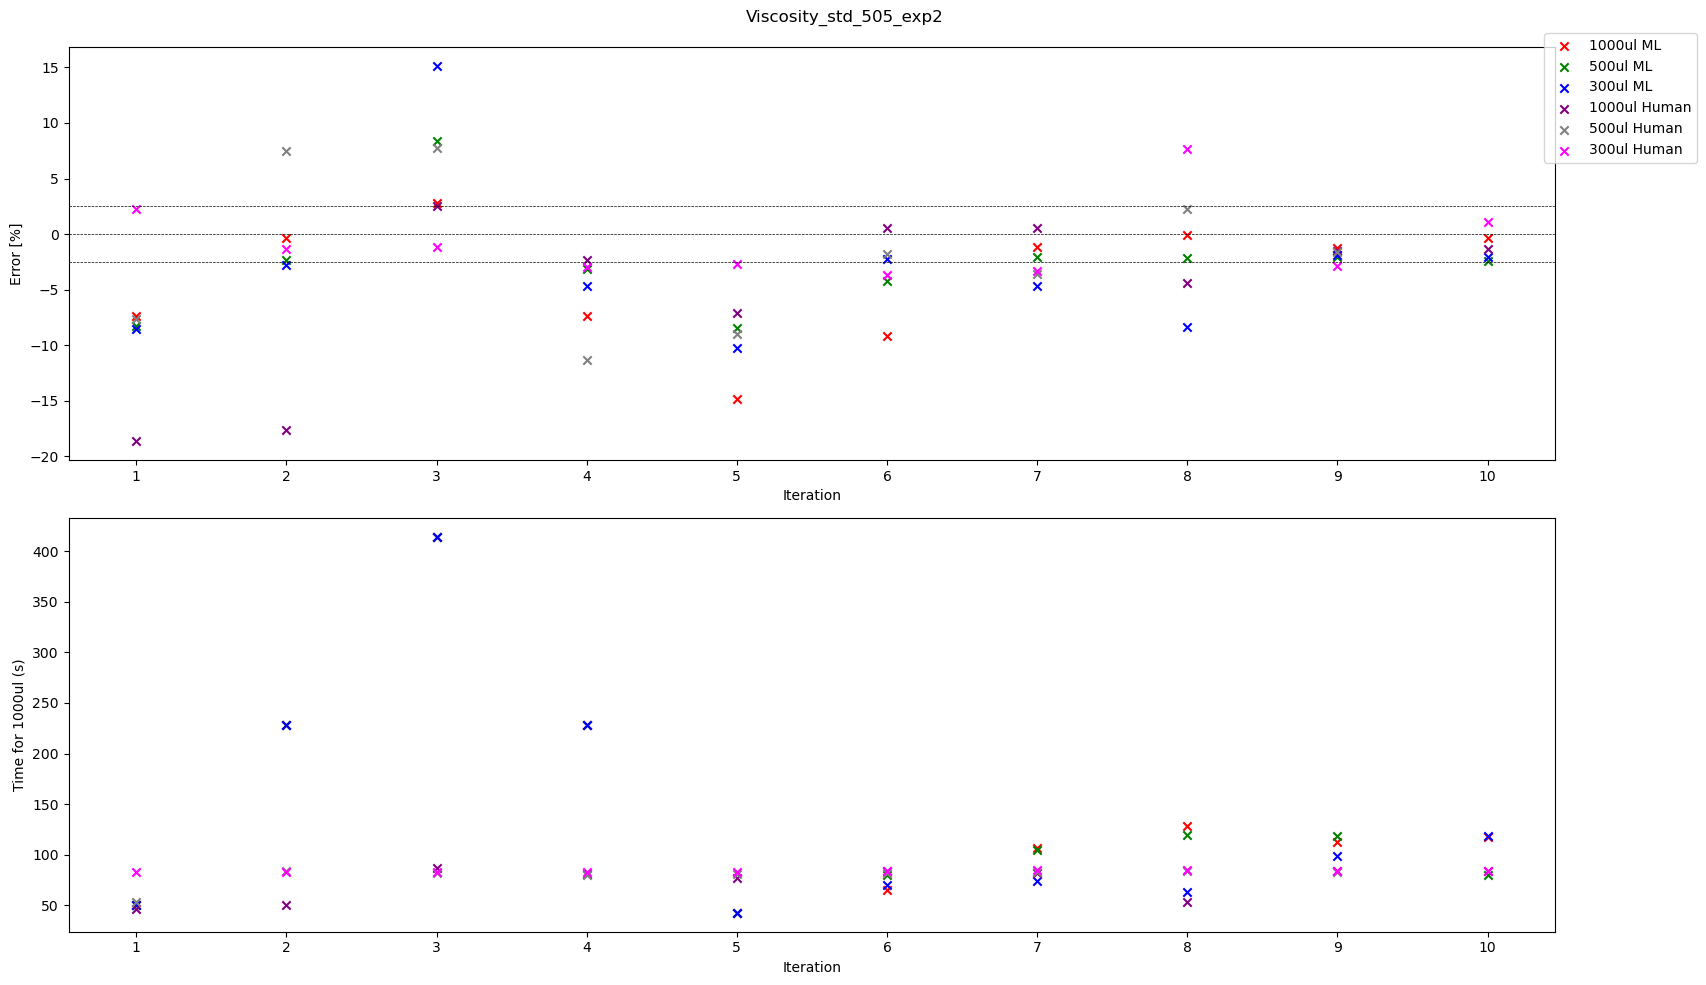

In [35]:
fig,axs = plt.subplots(2,1)

# Plotting graph 1: Iteration against error
axs[0].scatter(df_cal_1000['iteration'],df_cal_1000['%error'], marker= 'x', label = '1000ul ML', c = 'red')
axs[0].scatter(df_cal_500['iteration'],df_cal_500['%error'], marker= 'x', label = '500ul ML', c = 'green')
axs[0].scatter(df_cal_300['iteration'],df_cal_300['%error'], marker= 'x', label = '300ul ML', c = 'blue')
#axs[0].scatter(df_cal_mean['iteration'],df_cal_mean['%error'], marker= 'x', label = 'mean ML', c = 'orange')
axs[0].scatter(calibration_1000['iteration'],calibration_1000['%error'], marker= 'x', c="purple", label = '1000ul Human')
axs[0].scatter(calibration_500['iteration'],calibration_500['%error'], marker= 'x', c="grey", label = '500ul Human')
axs[0].scatter(calibration_300['iteration'],calibration_300['%error'], marker= 'x', c="magenta", label = '300ul Human')

# Setting graph 1 labels
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error [%]')

# Plotting graph 2: Iteration against Time
#axs[1].scatter(df_cal_mean['iteration'],df_cal_mean['time_for_1000'], marker= 'x', label = 'mean ML', c = 'orange')
axs[1].scatter(df_cal_1000['iteration'],df_cal_1000['time_for_1000'], marker= 'x', label = '1000ul ML', c = 'red')
axs[1].scatter(df_cal_500['iteration'],df_cal_500['time_for_1000'], marker= 'x', label = '500ul ML', c = 'green')
axs[1].scatter(df_cal_300['iteration'],df_cal_300['time_for_1000'], marker= 'x', label = '300ul ML', c = 'blue')
axs[1].scatter(calibration_1000['iteration'],calibration_1000['time_for_1000'], marker= 'x', c="purple", label = '1000ul Human')
axs[1].scatter(calibration_500['iteration'],calibration_500['time_for_1000'], marker= 'x', c="grey", label = '500ul Human')
axs[1].scatter(calibration_300['iteration'],calibration_300['time_for_1000'], marker= 'x', c="magenta", label = '300ul Human')

# Setting graph 2 labels
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Time for 1000ul (s)')

#Formatting subplots
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig.set_size_inches(17, 10)
fig.suptitle('Viscosity_std_'+std+'_exp2')
axs[0].legend(bbox_to_anchor=(1.1, 1.05))
fig.tight_layout()
axs[0].xaxis.set_major_locator(MultipleLocator(1))
axs[0].xaxis.set_major_formatter('{x:.0f}')
axs[0].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=2.5, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=-2.5, ls = '--', color = 'black', linewidth=0.5)
axs[1].xaxis.set_major_locator(MultipleLocator(1))
axs[1].xaxis.set_major_formatter('{x:.0f}')

folder3 = (r"C:\Users\Shivam\Documents\GitHub\viscosity_liquid_transfer_Pablo\Opentrons_experiments\BOTorch_optimization\VS_code_csv\graphs\Updated with blow out")
fig.savefig(folder3+r'/'+'Viscosity_std_'+std+'_exp2.png')

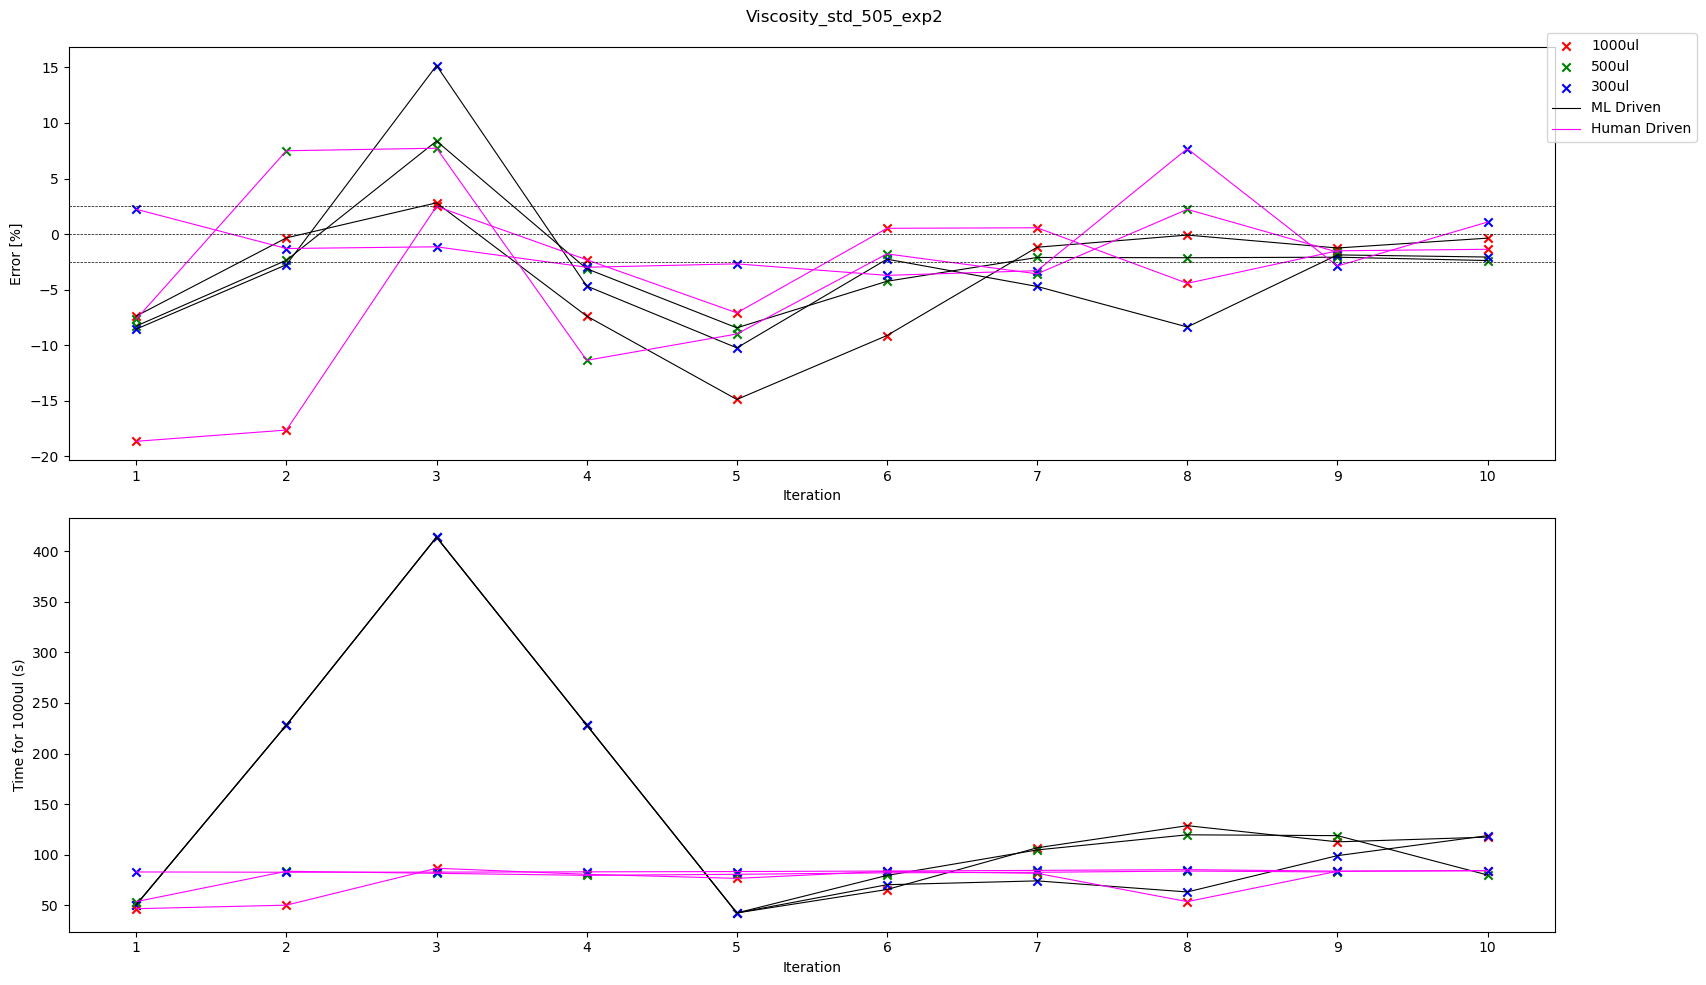

In [36]:
fig,axs = plt.subplots(2,1)

# Plotting graph 1: Iteration against error
axs[0].scatter(df_cal_1000['iteration'],df_cal_1000['%error'], marker= 'x', label = '1000ul', c = 'red')
axs[0].plot(df_cal_1000['iteration'],df_cal_1000['%error'], c = 'black', linewidth=0.8)
axs[0].scatter(df_cal_500['iteration'],df_cal_500['%error'], marker= 'x', label = '500ul', c = 'green')
axs[0].plot(df_cal_500['iteration'],df_cal_500['%error'], c = 'black', linewidth=0.8)
axs[0].scatter(df_cal_300['iteration'],df_cal_300['%error'], marker= 'x', label = '300ul', c = 'blue')
axs[0].plot(df_cal_300['iteration'],df_cal_300['%error'], label = 'ML Driven', c = 'black', linewidth=0.8)
#axs[0].scatter(df_cal_mean['iteration'],df_cal_mean['%error'], marker= 'x', label = 'mean', c = 'orange')
#axs[0].plot(df_cal_mean['iteration'],df_cal_mean['%error'], label = 'ML Driven', c = 'black', linewidth=0.8)
axs[0].scatter(calibration_1000['iteration'],calibration_1000['%error'], marker= 'x', c="red")
axs[0].plot(calibration_1000['iteration'],calibration_1000['%error'], c = 'magenta', linewidth=0.8)
axs[0].scatter(calibration_500['iteration'],calibration_500['%error'], marker= 'x', c="green")
axs[0].plot(calibration_500['iteration'],calibration_500['%error'], c = 'magenta', linewidth=0.8)
axs[0].scatter(calibration_300['iteration'],calibration_300['%error'], marker= 'x', c="blue")
axs[0].plot(calibration_300['iteration'],calibration_300['%error'], label = 'Human Driven', c = 'magenta', linewidth=0.8)

# Setting graph 1 labels
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error [%]')

# Plotting graph 2: Iteration against Time
#axs[1].scatter(df_cal_mean['iteration'],df_cal_mean['time_for_1000'], marker= 'x', label = 'mean', c = 'orange')
axs[1].scatter(df_cal_1000['iteration'],df_cal_1000['time_for_1000'], marker= 'x', label = '1000', c = 'red')
axs[1].scatter(df_cal_500['iteration'],df_cal_500['time_for_1000'], marker= 'x', label = '500', c = 'green')
axs[1].scatter(df_cal_300['iteration'],df_cal_300['time_for_1000'], marker= 'x', label = '300', c = 'blue')
axs[1].scatter(calibration_1000['iteration'],calibration_1000['time_for_1000'], marker= 'x', c="red")
axs[1].scatter(calibration_500['iteration'],calibration_500['time_for_1000'], marker= 'x', c="green")
axs[1].scatter(calibration_300['iteration'],calibration_300['time_for_1000'], marker= 'x', c="blue")
#axs[1].plot(df_cal_mean['iteration'],df_cal_mean['time_for_1000'], c = 'black', linewidth=0.8)
axs[1].plot(df_cal_1000['iteration'],df_cal_1000['time_for_1000'], c = 'black', linewidth=0.8)
axs[1].plot(df_cal_500['iteration'],df_cal_500['time_for_1000'], c = 'black', linewidth=0.8)
axs[1].plot(df_cal_300['iteration'],df_cal_300['time_for_1000'], label = 'ML Driven', c = 'black', linewidth=0.8)
axs[1].plot(calibration_1000['iteration'],calibration_1000['time_for_1000'], c = 'magenta', linewidth=0.8)
axs[1].plot(calibration_500['iteration'],calibration_500['time_for_1000'], c = 'magenta', linewidth=0.8)
axs[1].plot(calibration_300['iteration'],calibration_300['time_for_1000'], label = 'Human Driven', c = 'magenta', linewidth=0.8)

# Setting graph 2 labels
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Time for 1000ul (s)')

#Formatting subplots
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig.set_size_inches(17, 10)
fig.suptitle('Viscosity_std_'+std+'_exp2')
axs[0].legend(bbox_to_anchor=(1.1, 1.05))
fig.tight_layout()
axs[0].xaxis.set_major_locator(MultipleLocator(1))
axs[0].xaxis.set_major_formatter('{x:.0f}')
axs[0].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=2.5, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=-2.5, ls = '--', color = 'black', linewidth=0.5)
axs[1].xaxis.set_major_locator(MultipleLocator(1))
axs[1].xaxis.set_major_formatter('{x:.0f}')

folder3 = (r"C:\Users\Shivam\Documents\GitHub\viscosity_liquid_transfer_Pablo\Opentrons_experiments\BOTorch_optimization\VS_code_csv\graphs\Updated with blow out")
fig.savefig(folder3+r'/'+'Viscosity_std_'+std+'_exp2_scatter.png')
